In [57]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from  matplotlib import pyplot as plt
from keras import models
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array 
import matplotlib.image as img
%matplotlib inline

In [58]:
cd C:/IBM_Project/venv/model/dataset/veg-dataset/veg-dataset/train_set


C:\IBM_Project\venv\model\dataset\veg-dataset\veg-dataset\train_set


In [59]:
ls


 Volume in drive C is WINDOWS
 Volume Serial Number is 8C55-EDE3

 Directory of C:\IBM_Project\venv\model\dataset\veg-dataset\veg-dataset\train_set

04-11-2022  20:59    <DIR>          .
04-11-2022  20:59    <DIR>          ..
04-11-2022  20:57    <DIR>          Pepper,_bell___Bacterial_spot
04-11-2022  20:58    <DIR>          Pepper,_bell___healthy
04-11-2022  20:58    <DIR>          Potato___Early_blight
04-11-2022  20:58    <DIR>          Potato___healthy
04-11-2022  20:58    <DIR>          Potato___Late_blight
04-11-2022  20:59    <DIR>          Tomato___Bacterial_spot
04-11-2022  20:59    <DIR>          Tomato___Late_blight
04-11-2022  20:59    <DIR>          Tomato___Leaf_Mold
04-11-2022  21:00    <DIR>          Tomato___Septoria_leaf_spot
               0 File(s)              0 bytes
              11 Dir(s)  98,266,992,640 bytes free


In [60]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [61]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [62]:
pwd

'C:\\IBM_Project\\venv\\model\\dataset\\veg-dataset\\veg-dataset\\train_set'

In [63]:
x_train=train_datagen.flow_from_directory(r"C:\IBM_Project\venv\model\dataset\veg-dataset\veg-dataset\train_set",target_size=(64,64),class_mode='categorical',batch_size=24)

Found 11386 images belonging to 9 classes.


In [64]:
x_test=test_datagen.flow_from_directory(r"C:\IBM_Project\venv\model\dataset\veg-dataset\veg-dataset\train_set",target_size=(64,64),class_mode='categorical',batch_size=24)

Found 11386 images belonging to 9 classes.


In [65]:
x_train.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

In [66]:
model=Sequential()

In [67]:
model.add(Convolution2D(64,(3,3),input_shape=(64,64,3),activation='relu'))

In [68]:
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 61504)             0         
                                                                 
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


In [69]:
model.add(Dense(300,input_dim=4,activation='relu'))

In [70]:
model.add(Dense(150,activation='relu'))

In [71]:
model.add(Dense(9,activation='softmax'))

In [72]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [73]:
len(x_train)

475

In [74]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10, verbose=1 )

Epoch 1/10
475/475 [==============================] - 496s 1s/step - loss: 1.0946 - accuracy: 0.6275 - val_loss: 0.5531 - val_accuracy: 0.8058
Epoch 2/10
475/475 [==============================] - 267s 560ms/step - loss: 0.5474 - accuracy: 0.8045 - val_loss: 0.4655 - val_accuracy: 0.8322
Epoch 3/10
475/475 [==============================] - 279s 579ms/step - loss: 0.4173 - accuracy: 0.8555 - val_loss: 0.6599 - val_accuracy: 0.7698
Epoch 4/10
475/475 [==============================] - 268s 560ms/step - loss: 0.3724 - accuracy: 0.8700 - val_loss: 0.3579 - val_accuracy: 0.8757
Epoch 5/10
475/475 [==============================] - 312s 656ms/step - loss: 0.3298 - accuracy: 0.8843 - val_loss: 0.2926 - val_accuracy: 0.8931
Epoch 6/10
475/475 [==============================] - 352s 742ms/step - loss: 0.2801 - accuracy: 0.9005 - val_loss: 0.1868 - val_accuracy: 0.9320
Epoch 7/10
475/475 [==============================] - 304s 631ms/step - loss: 0.2476 - accuracy: 0.9155 - val_loss: 0.3062 - va

In [75]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 61504)             0         
                                                                 
 dense_9 (Dense)             (None, 300)               18451500  
                                                                 
 dense_10 (Dense)            (None, 150)               45150     
                                                                 
 dense_11 (Dense)            (None, 9)                 1359      
                                                      

In [76]:
ls

 Volume in drive C is WINDOWS
 Volume Serial Number is 8C55-EDE3

 Directory of C:\IBM_Project\venv\model\dataset\veg-dataset\veg-dataset\train_set

04-11-2022  20:59    <DIR>          .
04-11-2022  20:59    <DIR>          ..
04-11-2022  20:57    <DIR>          Pepper,_bell___Bacterial_spot
04-11-2022  20:58    <DIR>          Pepper,_bell___healthy
04-11-2022  20:58    <DIR>          Potato___Early_blight
04-11-2022  20:58    <DIR>          Potato___healthy
04-11-2022  20:58    <DIR>          Potato___Late_blight
04-11-2022  20:59    <DIR>          Tomato___Bacterial_spot
04-11-2022  20:59    <DIR>          Tomato___Late_blight
04-11-2022  20:59    <DIR>          Tomato___Leaf_Mold
04-11-2022  21:00    <DIR>          Tomato___Septoria_leaf_spot
               0 File(s)              0 bytes
              11 Dir(s)  98,264,686,592 bytes free


In [97]:
model.save('vegetable.h5')

In [99]:
model=load_model('C:/IBM_Project/venv/model/dataset/veg-dataset/veg-dataset/train_set/vegetable.h5')

In [100]:
img=image.load_img(r"C:\IBM_Project\venv\model\dataset\Veg-dataset\Veg-dataset\test_set\Potato___healthy\a8d687be-3777-403f-bae7-5c8c19340b3f___RS_HL 1738.JPG")

In [101]:
x=image.img_to_array(img)

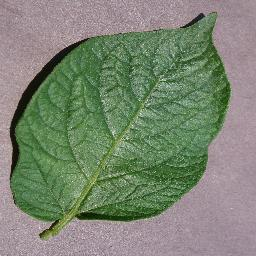

In [102]:
img

In [103]:
x

array([[[157., 138., 144.],
        [162., 143., 149.],
        [154., 135., 141.],
        ...,
        [159., 142., 148.],
        [162., 145., 151.],
        [167., 150., 156.]],

       [[144., 125., 131.],
        [158., 139., 145.],
        [159., 140., 146.],
        ...,
        [159., 142., 148.],
        [160., 143., 149.],
        [162., 145., 151.]],

       [[155., 136., 142.],
        [154., 135., 141.],
        [150., 131., 137.],
        ...,
        [163., 146., 152.],
        [161., 144., 150.],
        [161., 144., 150.]],

       ...,

       [[156., 141., 148.],
        [164., 149., 156.],
        [159., 144., 151.],
        ...,
        [156., 140., 151.],
        [157., 141., 152.],
        [158., 142., 153.]],

       [[175., 160., 167.],
        [155., 140., 147.],
        [148., 133., 140.],
        ...,
        [152., 136., 147.],
        [154., 138., 149.],
        [156., 140., 151.]],

       [[209., 194., 201.],
        [159., 144., 151.],
        [153., 1